In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import *

import pickle
import warnings
warnings.filterwarnings('ignore')

In [180]:
df = pd.read_csv('/Users/mitssverma/car_predict.csv')
df

,Unnamed: 0,Brand,Name,Year,Fuel,Driven(km),City,Price
0,0,Honda,Honda Amaze 1.2 VX i-VTEC,2017,Petrol,"98,055",Pune,5.7 Lakh
1,1,Nissan,Nissan Micra Active XV,2016,Petrol,"45,227",Bhopal,3.85 Lakh
2,2,Renault,Renault Kwid RXT [-],2017,Petrol,"48,000",Noida,2.75 Lakh
3,3,Honda,Honda City VX,2021,Petrol,"1,500",Mumbai,13.65 Lakh
4,4,BMW,BMW X1 sDrive20d,2012,Diesel,"61,000",Mumbai,12.5 Lakh
...,...,...,...,...,...,...,...,...
3937,3937,HONDA,HONDA CITY V PETROL [-],2017,Petrol,"58,424",Indore,"8,99,000"
3938,3938,MG,MG HECTOR SHARP 1.5 DCT PETROL [-],2021,Petrol,"9,529",Indore,"20,99,000"
3939,3939,TOYOTA,TOYOTA URBAN CRUISER HIGH GRADE MT,2021,Petrol,"11,037",Indore,"9,00,000"
3940,3940,MARUTI,MARUTI SUZUKI VITARA BREZZA VDI,2016,Petrol,"41,508",Bhopal,"6,70,000"


## EDA

In [181]:
df.describe()

,Unnamed: 0,Year
count,3942.000000,3942.000000
mean,1970.500000,2015.840690
std,1138.101709,3.341433
min,0.000000,1996.000000
25%,985.250000,2014.000000
50%,1970.500000,2016.000000
75%,2955.750000,2018.000000
max,3941.000000,2022.000000


In [182]:
df.isna().sum()

Unnamed: 0    0
Brand         0
Name          0
Year          0
Fuel          0
Driven(km)    0
City          0
Price         0
dtype: int64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942 entries, 0 to 3941
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3942 non-null   int64 
 1   Brand       3942 non-null   object
 2   Name        3942 non-null   object
 3   Year        3942 non-null   int64 
 4   Fuel        3942 non-null   object
 5   Driven(km)  3942 non-null   object
 6   City        3942 non-null   object
 7   Price       3942 non-null   object
dtypes: int64(2), object(6)
memory usage: 246.5+ KB


**- Data Cleaning**

In [184]:
def convert(x):
    
    if type(x) == float or type(x) == int:
        return x
    
    if 'Lakh' in x:
        if len(x) > 1:
            return float(x.replace('Lakh', '')) * 100000
        return 100000
    
    if 'Cr' in x:
        if len(x) > 1:
            return float(x.replace('Cr', '')) * 10000000
        return 10000000
    
    if ',' in x:
        return x.replace(',','')
    
    else:
        return x

In [186]:
price,drive = [],[]

In [187]:
for i in df['Price']:
    price.append(convert(i))

In [188]:
for i in df['Driven(km)']:
    drive.append(convert(i))

In [189]:
df['Driven(km)'] = drive
df['Price'] = price

In [190]:
df['Price'] = df['Price'].astype(int)
df['Driven(km)'] = df['Driven(km)'].astype(int)

In [191]:
new = []
for i in df['Name']:
    new.append(i.replace('[-]',' '))

In [192]:
df['Name'] = new

In [193]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [194]:
df

,Brand,Name,Year,Fuel,Driven(km),City,Price
0,Honda,Honda Amaze 1.2 VX i-VTEC,2017,Petrol,98055,Pune,570000
1,Nissan,Nissan Micra Active XV,2016,Petrol,45227,Bhopal,385000
2,Renault,Renault Kwid RXT,2017,Petrol,48000,Noida,275000
3,Honda,Honda City VX,2021,Petrol,1500,Mumbai,1365000
4,BMW,BMW X1 sDrive20d,2012,Diesel,61000,Mumbai,1250000
...,...,...,...,...,...,...,...
3937,HONDA,HONDA CITY V PETROL,2017,Petrol,58424,Indore,899000
3938,MG,MG HECTOR SHARP 1.5 DCT PETROL,2021,Petrol,9529,Indore,2099000
3939,TOYOTA,TOYOTA URBAN CRUISER HIGH GRADE MT,2021,Petrol,11037,Indore,900000
3940,MARUTI,MARUTI SUZUKI VITARA BREZZA VDI,2016,Petrol,41508,Bhopal,670000


## Visualization

<AxesSubplot:xlabel='count', ylabel='Brand'>

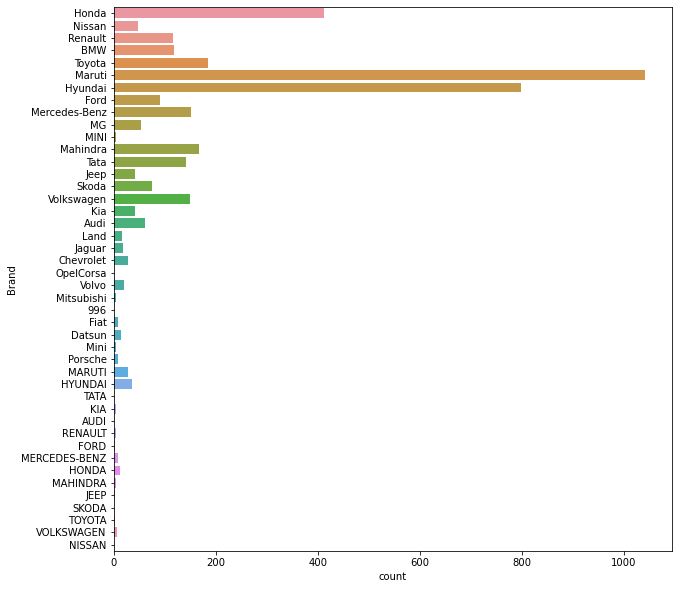

In [195]:
plt.figure(figsize=(10,10))
sns.countplot(y = df['Brand'])

<AxesSubplot:xlabel='count', ylabel='Fuel'>

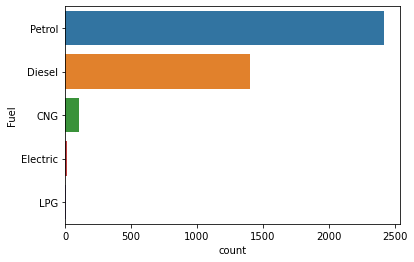

In [196]:
sns.countplot(y = df['Fuel'])

<AxesSubplot:xlabel='count', ylabel='City'>

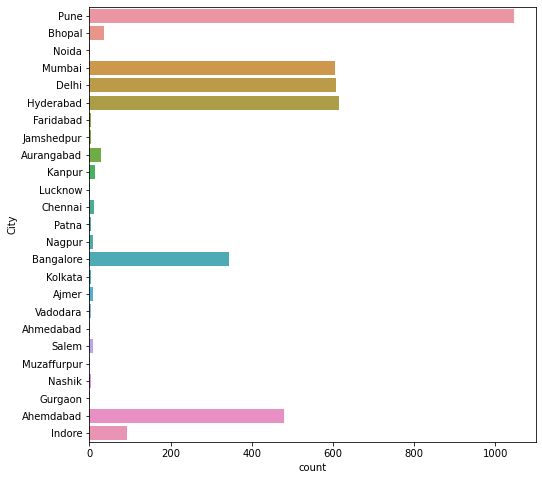

In [197]:
plt.figure(figsize=(8,8))
sns.countplot(y = df['City'])

<AxesSubplot:xlabel='Price', ylabel='Brand'>

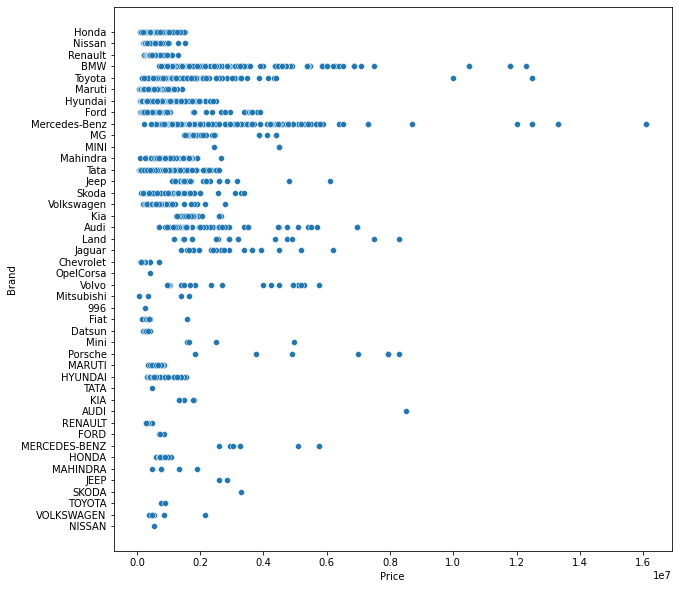

In [198]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Price',y = 'Brand',data = df)

<AxesSubplot:xlabel='Price', ylabel='Driven(km)'>

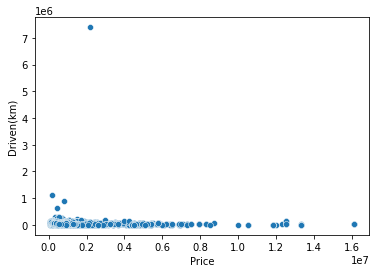

In [199]:
sns.scatterplot(y = 'Driven(km)',x = 'Price',data = df)

<AxesSubplot:xlabel='Price', ylabel='Fuel'>

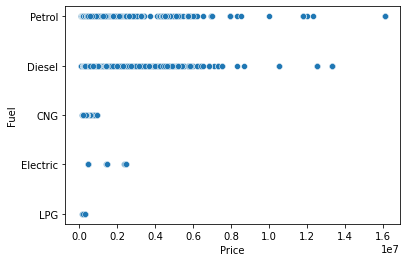

In [200]:
sns.scatterplot(x = 'Price',y = 'Fuel',data = df)

<AxesSubplot:xlabel='Price', ylabel='City'>

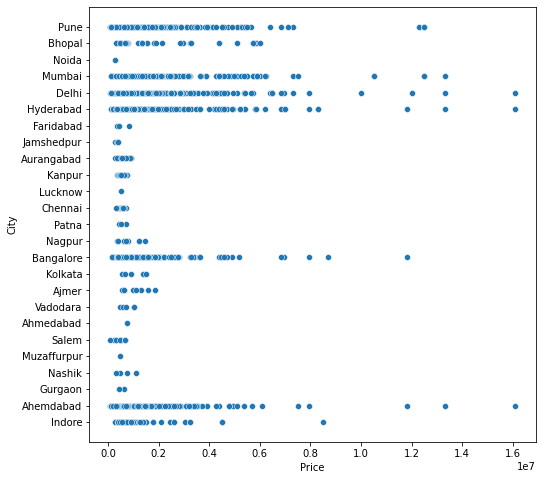

In [201]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'Price',y = 'City',data = df)

## Encoding

In [203]:
lb = LabelEncoder()

In [204]:
df['Name'] = lb.fit_transform(df['Name'])
df['City'] = lb.fit_transform(df['City'])
df['Brand'] = lb.fit_transform(df['Brand'])
df['Fuel'] = lb.fit_transform(df['Fuel'])

In [207]:
df

,Brand,Name,Year,Fuel,Driven(km),City,Price
0,11,96,2017,4,98055,22,570000
1,30,403,2016,4,45227,5,385000
2,34,424,2017,4,48000,20,275000
3,11,108,2021,4,1500,16,1365000
4,3,22,2012,1,61000,16,1250000
...,...,...,...,...,...,...,...
3937,9,60,2017,4,58424,11,899000
3938,22,254,2021,4,9529,11,2099000
3939,38,441,2021,4,11037,11,900000
3940,20,240,2016,4,41508,5,670000


## Model Building.

**- Seperating features and label.**

In [208]:
x = df.drop('Price',axis =1)
y = df.Price

**- Applying StandardScaler.**

In [210]:
scaler = StandardScaler()

In [214]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.93742728, -1.16979648,  0.34699396,  0.78711319,  0.32765067,
         1.31624568],
       [ 0.81461715,  1.01150952,  0.0476832 ,  0.78711319, -0.0997983 ,
        -0.9015123 ],
       [ 1.18346861,  1.16071938,  0.34699396,  0.78711319, -0.07736103,
         1.05533298],
       ...,
       [ 1.55232007,  1.28150831,  1.544237  ,  0.78711319, -0.37644099,
        -0.11877419],
       [-0.1075115 , -0.14664318,  0.0476832 ,  0.78711319, -0.12988996,
        -0.9015123 ],
       [ 0.72240429,  0.97598336,  0.34699396,  0.78711319, -0.17918237,
        -0.11877419]])

**- Train Test Split.**

In [218]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state = 90, test_size = 0.25)

**Function for Training & Testing.**

In [219]:
def score(reg, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = reg.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = reg.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_test,pred))
        print('Mean Absolute Error:',mean_absolute_error(y_test,pred))

**- Model Instantiating.**

In [223]:
rf = RandomForestRegressor()
ada = AdaBoostRegressor()
gb = GradientBoostingRegressor()
svr = SVR()
knn = KNeighborsRegressor()

**- RandomForest Regressor.**

In [222]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.9793886664446027

 ----- Test Result ----- 

R2 Score: 0.8023402936439155
Mean Absolute Error: 228386.78317523902


**- AdaBoost Regressor.**

In [224]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: -0.5244165804043754

 ----- Test Result ----- 

R2 Score: -1.055646062073242
Mean Absolute Error: 1552650.8041604715


**- GradientBoosting Regressor.**

In [225]:
gb.fit(x_train,y_train)
score(gb, x_train,x_test,y_train,y_test,train = True)
score(gb, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.8653486749511684

 ----- Test Result ----- 

R2 Score: 0.760550538301414
Mean Absolute Error: 295744.3045491251


**- SupperVector Regressor.**

In [226]:
svr.fit(x_train,y_train)
score(svr, x_train,x_test,y_train,y_test,train = True)
score(svr, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: -0.08581709576846541

 ----- Test Result ----- 

R2 Score: -0.09063739749513333
Mean Absolute Error: 568163.0950604408


**- KNeighbors Regressor.**

In [227]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.6191224987301477

 ----- Test Result ----- 

R2 Score: 0.3040107458056932
Mean Absolute Error: 442420.1900608519


                RandomForestRegressor, is giving the best score among all other model.

## Hyperparameter Tuning.

In [229]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [232]:
param = {"n_estimators":[20, 100, 200],
           "max_depth":[None, 1, 2, 5],
           "max_features":[0.5, 1, "auto", "sqrt"],
           }

In [233]:
grid = GridSearchCV(rf, param_grid = param)
grid.fit(x_train,y_train)
print('Best Params = ',grid.best_params_)

Best Params =  {'max_depth': None, 'max_features': 0.5, 'n_estimators': 200}


In [234]:
params = {"min_samples_split":[ 2, 5, 10],
           "min_samples_leaf":[1, 2, 3, 5]}

In [235]:
grid = GridSearchCV(rf, param_grid = params)
grid.fit(x_train,y_train)
print('Best Params = ',grid.best_params_)

Best Params =  {'min_samples_leaf': 1, 'min_samples_split': 2}


In [236]:
rf_hyp = RandomForestRegressor(max_depth = None, max_features = 0.5, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

In [237]:
rf_hyp.fit(x_train,y_train)
score(rf_hyp, x_train,x_test,y_train,y_test,train = True)
score(rf_hyp, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.9783061196967381

 ----- Test Result ----- 

R2 Score: 0.8283762349117869
Mean Absolute Error: 226478.25855438437


    Post tuning score, is better than the default parameter, so saving the post tuning parameters for the model.

## Saving the Model.

In [239]:
filename = 'car_price.pickle'
pickle.dump(rf_hyp, open(filename, 'wb'))